# Datatiedeprojekti

### Riina Peltonen


## Johdanto

Tämän datatiedeprojektin tarkoituksena on edetä oppimispäiväkirjan tyylisesti datatieteen työnkulkua noudatten. Tässä työkirjassa käydään läpi vaiheet datan keräämisestä, hallinnoinnista ja esikäsittelystä aina koneoppimismalleihin ja luonnollisen kielen prosessointiin eri keinoin. Työkirjassa esitellään esimerkkien ja itse kerätyn aineiston avulla eri työvaiheita ja metodeja käsitellä eri tyyppistä dataa. Työkirja etenee teorian ja koodiesimerkkien avulla.

Datatiedeprojektin aineistoksi valikoitui terveyteen ja kuntoiluun liittyvän sovelluksen käyttäjäpalautteiden ja -arvioiden tarkastelu. Tarkoituksena on selvittää piirteitä käyttäjäkunnasta ja tehdä siihen liittyen ennusteita. Idea lähti liikkeelle omasta kiinnostuksestani terveysteknologiaa kohtaan. Muutamien hakujen perusteella kiinnostavaksi tutkimuskohteeksi osoittautui Fitbit-fitness-sovellus. Sovelluksesta oli esitietojen perusteella hyvin saatavilla käyttäjäarvioita ja sovellus on maailmanlaajuisesti suosittu. Kiinnostavaa on selvittää, millaisia käyttäjäarvioita tuotteelle on annettu ja yritetään selvittää, millaisia ongelmia tuotteen käytössä mahdollisesti esiintyy. Aineisto kerätään raapimalla Google Play Storesta ja aineistolle tehdään mm. sentimenttianalyysi.


## Python-kirjastot ja ympäristövaihtoehdot

### Keskeisiä Python-kirjastoja datatiedeprojektiin:
- NumPy: Laskenta, moniulotteiset taulukot ja matriisit, funktioita.
- Pandas: Datan käsittely ja analysointi,
- Matplotlib: Datan visuailisointikirjasto
- Seaborn: edistyneet visualisoinnit
- Scikit-learn: Koneoppimisen kirjasto datan louhintaan ja analysointiiniin
- nltk: Natural language toolkit, luonnollisen kielen käsittelyyn

Kirjastot voidaan asentaa pip install -komennolla ja ottaa käyttöön import -komennolla:


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

>Keräsin kaikki käyttämäni kirjastot ja niiden versiot requirements.txt -tiedostoon. (Tallensin myös raapimani tiedot datasetiksi (Google_Play_reviews.csv) tähän kansioon varmuuden vuoksi, jos raavinta ei jostain syystä onnistuisikaan.) Reviews.csv-tiedosto on kansiossa loppuvaiheen mallin kokeilua varten.

In [2]:
!pip install -r requirements.txt

### Työskentely-ympäristöjä

Tärkeää, että ympäristössä pystytään monipuolisesti hyödyntämään eri kirjastoja. Kokeilin aluksi Google Colabia, sillä siinä pääsee ilman ylimääräisiä asennuksia heti aloittamaan. Google Colab on pilvipohjainen palvelu, jolla on tehokkaat laskentaresurssit.
Visual Studio Code on myös monipuolinen työympäristö, jossa pystyy laajasti hyödyntämään kirjastoja.
Myös PyCharm soveltuu monimutkaisiin datatiedeprojekteihin. Se tukee monia plugineja ja integroituu hyvin muihin työkaluihin ja palveluihin.
Valitsin lopulta käyttööni Anacondan, sillä se vaikutti selkeältä ja monipuoliselta ohjelmalta. Myös harjoitusryhmissä on kyseinen ympäristö käytössä, joten se tuntui luontevalta valinnalta.


### Datan hallinnointi

Kun on saatu jokin aineisto käyttöön, on se monesti ns raakadataa, jota täytyy vielä "siivota" ja jalostaa luettavampaan ja analysoitavaan muotoon. Olen itse ollut eräässä tutkimusprojektissa mukana tekemässä juurikin tätä datan siivoamista ja jalostamista. Käytännössä se tarkoittaa esimerkiksi sitä, että käydään läpi mahdolliset puuttuvat arvot ja arvotyypit, sekä epäjohdonmukaisuuksien selvittäminen. Jotta dataa pystyttäisiin analysoimaan, tulee datan olla oikeassa muodossa, esim. string, int, float, riippuen tiedon laadusta. Datan jalostaminen voi sisältää laajempia toimia, joilla valmistellaan data vaikkapa koneoppimiseen. Nämä vaiheet ovat kriittisiä ja työläitä, mutta niiden avulla saadaan luotettavampaa ja analysoitavaa dataa tuotettua.

## Datalähteet ja datan kerääminen sekä datan esikäsittely

### Datalähteet
Ensimmäinen vaihe datatiedeprojektissa on datalähteiden ja datan hankkiminen. Ajattelin lähtökohtaisesti, että kurssilla keskitytään "valmiiden" olemassaolevien datasettien työstämiseen. Opin kuitenkin, että olisi kannattavaa opetella verkkosivujen 'raapimista' ja ryömijöiden käyttöä. Termit olivat täysin vieraita, mutta herättivät kiinnostukseni vahvasti, sillä tämä antaa niin paljon mahdollisuuksia tehdä erilaisia sovelluksia esimerkiksi. Datan raapiminen on prosessi, jossa tietoa kerätään automaattisesti verkkosivuilta tai muista tietolähteistä. Raavinnassa voidaan hyödyntää valmiita API:ja tai koodia. Periaatteena on, että esim. verkkosivuston HTLM-koodista tai rakenteesta haetaan tietyillä perusteilla tietoa. Alla olevassa kuvassa yksinkertaisesti datan raavinnan perusperiaate.

Verkko on täynnä erilaisia ja erimuotoisia valmiita datasettejä. Esimerkiksi Tilastokeskuksen sivuilta voi hakea eri aihepiireihiin liittyviä tilastoja. Kävin katselemassa Tilastokeskuksen sivuja, ja totesin, että suuri osa sieltä löytyvistä seteistä oli muutaman vuoden vanhoja. En löytänyt sieltä itselleni riittävän mielenkiintoisia aineistoja. Olin kuullut jo ennen tätä kurssia myös Kagglesta. Kaggle on verkkoalusta datatieteilijöille ja koneoppimisen harrastajille ja on täynnä erilaisia datasettejä. Siellä pystyy tarkastelemaan suoraan myös Jupyter Notebookkeja selaimella. Datasettejä löytyy melkein mistä vain aiheesta.



### Raapiminen (web scraping)
Raapiminen voi kohdistua esimerkiksi seuraaviin asioihin:
- Verkkosivut: voidaan hakea tietoa, kuten uutisartikkeleita, tuotetietoja, hintoja, arvosteluja
- Taulukot ja tietokannat: Datan raapiminen voi kohdistua myös taulukoihin ja tietokantoihin,ja voidaan hakea esim. yritysten yhteystietoja, sääennusteita tai tilastoja
- Sosiaanen media: voidaan hakea tietoa käyttäjistä, kommenteista ja muista julkisista tiedoista
- Hakukoneet: hakukoneiden tulosten kerääminen, jotta voidaan analysoida hakusanojen suosiota

Datan raapimiseen ja ryömintään tarkoitettuja työkaluja:
- BeautifulSoup
- Scrapy

Datan raapimista ja ryömintää voidaan hyödyntää esimerkiksi:
- Markkinatutkimus: kerätään tietoja tuotteiden hinnoista
- Tietokantojen rakentaminen: esim. uutisten, julkaisujen ja muiden artikkelien tietojen kerääminen tutkimuksia varten. Voidaan kerätä dataa esim somesta.
- Verkkosisällön seuranta: esim. hintojen, päivitysten ja uusien julkaisujen seuranta
- Tuotetietojen kerääminen
- Asiakashankinta

### Tärkeää:
Datan raapiminen ja ryömintä voivat olla voimakkaita työkaluja tietojen keräämisessä ja analysoinnissa, mutta on tärkeää huomioida eettiset ja oikeudelliset näkökulmat. Verkkosivustojen käyttöehdot ja paikalliset lait asettavat rajoituksia sille, miten ja millaista dataa voidaan kerät..


<img src="https://miro.medium.com/v2/resize:fit:1358/1*JvmMHj7gUkbKgQvuNUFNbg.png" width="700" height="500">

Kuva datan raavinnasta vaiheittain. Lähde https://medium.com/@pankaj_pandey/web-scraping-using-python-for-dynamic-web-pages-and-unveiling-hidden-insights-8dbc7da6dd26


<h2 style="color: #5B786D;"> Datatiedeprojekti vaihe 1. Tiedonkeruu </h2>

Tiedonkeruu aloitettiin yksinkertaisesti Google Play Storen hakutoiminnolla hakemalla sanalla "fitness".  Haun tuloksena on kolmekymmentä eri terveyteen liittyvää sovellusta. Haku perustuu siihen, että tulokset asetetaan tärkeysjärjestykseen kolmen pääelementin perusteella: osuvuus, osallistaminen ja laatu. Laitetyyppiä ei rajattu haussa. Valitsin tutkittavatksi Fitbit-fitness-sovelluksen, sillä se on hyvin suosittu appi (>50 miljoonaa latausta). Jonkin verran taustatutkimusta tehdessä kävi ilmi, että tarkempaa käyttäjädataa on saatavilla lähinnä kirjautuneille Google kehittäjille. Päädyin rajaamaan tutkimustani käyttäjäarvioihin, sillä ne ovat julkisesti nähtävillä. Datasta jätetään pois käyttäjänimet tietosuojan vuoksi. 

Saadusta datasta tehdään sentimenttianalyysi, jossa määritellään käyttäjäarvioiden, tunne- tai mielipidetila automaattisesti.

<h2 style="color: #5B786D;"> Kuvia Fitbit-sovelluksesta </h2>

![Fitbit-kuva](https://play-lh.googleusercontent.com/gXGdt35AKnlDG-lhqhPJzXcvR0G7lZSl4SFSb7t5_xTES2X_bLBXXt0t0nh-l-OludI=w526-h296-rw) ![kuva2](https://play-lh.googleusercontent.com/6rjEtIwRo5k2iOZYbXUIEewnFGo8AJboujtna-9iVKhmRRO-fmsdv0skPTG4KFtt9A=w526-h296-rw) ![kuva3](https://play-lh.googleusercontent.com/iNjYSIQm432qolpWsN6LUqcDtoVXFPGIHNEauf77-smSpydtX7tUx0jypCloxGGd2zA=w526-h296-rw) ![kuva4](https://play-lh.googleusercontent.com/Kx1wgpu7728iFe5YlZozbbKt1MK38wLghzvHyC-Q3nPURRjLDDnrodStNH8VGpCSxdA=w526-h296-rw)

Kuvat Fitbit LLC, Google Play Store

<h3 style="color: #6B8D7F;"> Datan kerääminen datatiedeprojektiin </h3>

Aihetta opiskellessani YouTube-tutoriaaleista, löysin valmiin Google Play Scraperin, joten hyödynnetään sitä datan keräämisessä. Scraper raapii käyttäjäarvosteluja Fitbit-sovelluksesta Google Play Storesta. Otetaan mukaan dataan arvioiden lisäksi tieto siitä, onko arvio saanut vastauksia kehittäjiltä. Sen perusteella voidaan arvioida esimerkiksi sitä, onko palautteen perusteella pyritty tekemään muutoksia sovelluksen toimivuuteen.

In [3]:
# Asennetaan data scraper
!pip install google_play_scraper

In [4]:
# Importataan tarvittavat kirjastot

from google_play_scraper import app, Sort, reviews_all
import numpy as np
import json, os, uuid

In [5]:
# Haetaan arvostelut Google Play:sta, käytetään aluksi haussa maakoodina USA:a ja kielenä englantia. 

g_reviews = reviews_all(
        "com.fitbit.FitbitMobile",
        sleep_milliseconds=0,
        lang='en',
        country='us',
        sort=Sort.NEWEST, # järjestetään arvostelut uusimmasta vanhimpaan
    )

In [6]:
# Muunnetaan tiedot dataframeksi
df = pd.DataFrame(np.array(g_reviews),columns=['review'])
df_final = df.join(pd.DataFrame(df.pop('review').tolist()))

# poistetaan ylimääräisiä sarakkeita ja uudelleen nimetään osa sarakkeista
df_final.drop(columns={'userImage', 'reviewCreatedVersion', 'userName'},inplace = True)
df_final.rename(columns= {'score': 'rating','userName': 'user_name', 'reviewId': 'review_id', 'content': 'review_description', 'at': 'review_date', 'replyContent': 'developer_response', 'repliedAt': 'developer_response_date', 'thumbsUpCount': 'thumbs_up'},inplace = True)
df_final.insert(loc=0, column='source', value='Google Play')
df_final.insert(loc=3, column='review_title', value=None)
df_final['laguage_code'] = 'en'
df_final['country_code'] = 'us'

df_final


,source,review_id,review_description,review_title,rating,thumbs_up,review_date,developer_response,developer_response_date,appVersion,laguage_code,country_code
0,Google Play,1c61dc83-fb2c-476d-90bc-7c409d296380,"Very good app would recommend, you do have to ...",None,4,0,2024-04-23 22:53:42,None,NaT,4.14.fitbit-mobile-110045073-617559692,en,us
1,Google Play,cda558ce-41f7-4a4a-94f5-d6e2ca33e0d3,"Honestly, I mostly use it to track my period n...",None,3,0,2024-04-23 22:50:03,None,NaT,4.14.fitbit-mobile-110045073-617559692,en,us
2,Google Play,8c982009-ed1a-4108-a91b-2f9b17c4239c,"Un friendly. Nothing obvious, cannot change to...",None,1,0,2024-04-23 22:45:14,None,NaT,4.14.fitbit-mobile-110045073-617559692,en,us
3,Google Play,8d1b982f-d8ad-4a54-ad70-8c61374e8491,Easy to use and syncs quickly. Great to keep t...,None,5,0,2024-04-23 22:42:31,None,NaT,4.14.fitbit-mobile-110045073-617559692,en,us
4,Google Play,72416eb2-16e1-44ac-bd00-919741da571f,"Could be better, not sure why, but it's stoppe...",None,3,0,2024-04-23 21:55:05,None,NaT,4.15.fitbit-mobile-110048703-624243509,en,us
...,...,...,...,...,...,...,...,...,...,...,...,...
393,Google Play,b0ad2c36-779b-492a-b9f7-14495089eb97,The current update is a disaster. You took a g...,None,2,1,2024-04-21 17:31:04,None,NaT,4.15.fitbit-mobile-110048703-624243509,en,us
394,Google Play,b7a26c28-9011-4b96-aa5e-57070cc42599,I now see that using my Fitbit app helps me st...,None,5,0,2024-04-21 17:27:40,None,NaT,4.14.fitbit-mobile-110045073-617559692,en,us
395,Google Play,347c3068-eee5-4a20-935a-06f481e5f540,My main reason for using the app was for sleep...,None,1,2,2024-04-21 17:18:31,None,NaT,4.14.fitbit-mobile-110045073-617559692,en,us
396,Google Play,12e0a954-ba3b-4d9c-aaee-83fc5f78164e,"Very useful, especially the sleep portion.",None,4,0,2024-04-21 17:17:18,None,NaT,4.14.fitbit-mobile-110045073-617559692,en,us


Valitsin maakoodiksi USA:n ja kieleksi englannin, sillä näillä parametreillä löytyi eniten arvosteluja. Suomeksi dataa löytyi vain vähän. Kun koodin ajaa ja hakee tiedot Google Playsta, vaihtelee arvostelujen määrä.

<h2 style="color: #5B786D;">Datatiedeprojekti vaihe 2. Datan esikäsittely </h2>

Datan esikäsittely on tärkeä vaihe, sillä sen avulla datasta saadaan laadukkaampaa ja sen käsitteleminen on helpompaa. Lopullisen analyysin kannalta, esikäsitelty ja huolella tarkistettu data voivat parantaa datan käytettävyyttä erilaisissa mallinnuksissa. Kun data on esikäsitelty huolella, on mahdollista saada parempia ja luotettavampia tuloksia. Esikäsittelyllä tarkoitetaan käytännössä esimerkiksi puuttuvien arvojen käsittelemistä ja korvaamista esim. keskiarvoilla.

In [7]:
# Tutkitaan mahdollisia puuttuvia arvoja

print(df_final.isnull().sum())

source                       0
review_id                    0
review_description           0
review_title               398
rating                       0
thumbs_up                    0
review_date                  0
developer_response         329
developer_response_date    329
appVersion                  18
laguage_code                 0
country_code                 0
dtype: int64


Todetaan, että developer_response puuttuu suurimmasta osasta, se kuitenkaan ei haittaa tässä kohtaa, sillä kaikki arviot eivät olekaan sellaisia, jotka vaatisivat vastausta. Myös review_title puuttuu kaikista arvosteluista, joten se sarake voitaisiin kokonaan pudottaa pois. Arvostelujen otsikoilla ei ole merkitystä tässä datassa.

In [8]:
# Poistetaan 'review_title' sarake, koska se puuttuu kaikista arvosteluista
df_final.drop(columns=['review_title'], inplace=True)

# Täytetään puuttuvat arvot oletusarvoilla
df_final['developer_response'].fillna('No Response', inplace=True)
df_final['developer_response_date'].fillna(pd.NaT, inplace=True)  # Käyttäen Not-a-Time merkintää puuttuville päivämäärille

# Käsitellään 'appVersion' puuttuvia arvoja
# Täytetään puuttuvat arvot yleisimmällä appVersion arvolla
most_common_version = df_final['appVersion'].mode()[0]  
df_final['appVersion'].fillna(most_common_version, inplace=True)

In [9]:
# Puhdistetaan ja muotoillaan data
df_final['review_date'] = pd.to_datetime(df_final['review_date'])
df_final['developer_response_date'] = pd.to_datetime(df_final['developer_response_date'])

# Tekstikenttien puhdistaminen
df_final['review_description'] = df_final['review_description'].str.replace('[^\w\s]', '', regex=True).str.lower()

In [10]:
# Tulostetaan DataFrame tarkistusta varten
print(df_final.head())

        source                             review_id  \
0  Google Play  1c61dc83-fb2c-476d-90bc-7c409d296380   
1  Google Play  cda558ce-41f7-4a4a-94f5-d6e2ca33e0d3   
2  Google Play  8c982009-ed1a-4108-a91b-2f9b17c4239c   
3  Google Play  8d1b982f-d8ad-4a54-ad70-8c61374e8491   
4  Google Play  72416eb2-16e1-44ac-bd00-919741da571f   

                                  review_description  rating  thumbs_up  \
0  very good app would recommend you do have to p...       4          0   
1  honestly i mostly use it to track my period no...       3          0   
2  un friendly nothing obvious cannot change to t...       1          0   
3  easy to use and syncs quickly great to keep tr...       5          0   
4  could be better not sure why but its stopped g...       3          0   

          review_date developer_response developer_response_date  \
0 2024-04-23 22:53:42        No Response                     NaT   
1 2024-04-23 22:50:03        No Response                     NaT   
2 2024-0

Data näyttää nyt lyhyen puhdistamisen jälkeen hyvältä. Tätä vaihetta voidaan vielä joutua jatkamaan, jos huomataan ongelmia seuraavissa vaiheissa.

## Koneoppimisen periaatteet
Koneoppiminen jaoitellaan eri tyyppeihin:

- ohjattu koneoppiminen: malli koulutetaan datalla, jossa on valmiit syötteet ja halutut tulosteet, tavoitteena oppia yhdistämään syötteet tuloksiin ennusteiden tekemiseksi. Esim. kuvatunnistus
- ohjaamaton koneoppiminen: datasta ei tiedetä mitään ennalta, tavoitteena löytää algoritmien avulla rakenteita ja ryhmittelyitä. Esim. klusterointi
- vahvistettu koneoppiminen: malli oppii päätöksentekoa suorittamalla tehtäviä ympäristössäsän siten, että se maksimoi jonkin palkkion. Esim. robottien ohjaaminen tai pelien tekoäly

Oma ajatukseni koneoppimisesta alunperin oli, että se on jotakin korkeaa tiedettä, jota on vaikeaa ymmärtää. Kuitenkin yksinkertaisimmillaan se voi olla lineaarisen regression toteuttamista ja erilaisten mallinnusten ja ennusteiden tekemistä datasta.

Tekoäly keskittyy älykkäiden, ihmisen älykkyyttä jäljittelevien koneiden ja ohjelmien luomiseen. Tekoäly voi hyödyntää erilaisia tekniikoita, kuten koneoppimista. Koneoppiminen pohjautuu dataan ja algoritmeihin, ja pystyy niiden avulla oppimaan säännönmukaisuuksia ja tekemään ennusteita. Koneoppimista hyödyntämällä tekoäly oppii ja sopeutuu erilaisiin tilanteisiin datan perusteella.

### Koneoppimisen prosessi
Koneoppimisen prosessi sisältää datan keräämisen, datan esikäsittelyn, mallin valinnan, - kouluttamisen, - arvioinnin ja mallin käyttöönottamisen:

- Datan kerääminen: kerätään tarvittava data mallin kouluttamiseksi
- Datan esikäsittely: Datan siivous ja valmistelu mallin kouluttamista varten. Esim. puuttuvien arvojen käsittely, kategoristen muuttujien koodaus ja normalisoi
- Mallin valinta: Valitaan sopiva algoritmi tai menetelmä
- Mallin kouluttaminen: Käytetään koulutusdataa mallin "opettamiseen", eli algoritmin parametrien säätämiseen siten, että malli oppii ennustamaan halutut tulosteet mahdollisimman tarkasti
- Mallin arviointi: Testataan mallin suorituskykyä näkemättömällä datalla arvioidakseen, kuinka hyvin malli todellisuudessa
- Mallin käyttöönotto: Kun malli on arvioitu ja todettu tyydyttäväksi, se voidaan ottaa käyttöön reaalimaailman ongelman ratkaisemiseen.

### Natural language processing
NLP keskittyy luonnollisen kielen ymmärtämiseen ja tuottamiseen koneiden avulla. Siinä tavoitellaan, että kone ymmäräisi kieltä kuten ihminen.

NLP:ssä on eri vaiheita: tekstin esikäsittely (esim. välimerkkien poisto, sanojen perusmuotoon palautus), lauserakenteen analyysi, semanttinen analyysi(pyrkii ymmärtämään lauseiden merkityksiä), diskurssianalyysi(tekstin ymmärtäminen kokonaisuutena) sekä kontekstin vaikutuksen tutkiminen viestin merkitykseen.

Sovellus esimerkkejä:

- chatbotit ja virtuaaliassistentit
- teksti puheeksi ja puhe tekstiksi
- sentimenttianalyysi (arvioidaan tunnetiloja ja mielipiteitä tekstistä)

Tässä työkirjassa työstetään tekstiä, eli saadut käyttäjäpalautteet käsitellään, luokitellaan ja analysoidaan. Seuraavassa jalostetaan piirteitä ja tehdään sentimenttianalyysi datalle.

<h2 style="color: #5B786D;">Datatiedeprojekti vaihe 3. Piirteiden jalostaminen (feature engineering)</h2>
Piirteiden jalostamisella tarkoitetaan esimerkiksi raakadatasta piirteiden tai ominaisuuksien tutkimista ja yhdistelyä. Piirteitä voidaan jalostaa myös esimerkiksi vähentämällä muuttujia, eli poistetaan epäolennaiset muuttujat, standardoimalla sekä poistamalla tausta kohinaa.

Aloitetaan datan jalostaminen sentimenttianalyysillä, kokeillaan TextBlob-kirjastoa arvostelutekstien sentimentin määrittämiseen.

<h3 style="color: #5B786D;"> Sentimenttianalyysi </h3>

>Sentimenttianalyysi on luonnollisen kielen käsittelyn (NLP) menetelmä, jota käytetään tekstin subjektiivisten ominaisuuksien, kuten mielialojen tai tunteiden, automaattiseen tunnistamiseen. Tämä menetelmä on hyödyllinen mm. tuotearviointien analysoinnissa ja asiakaspalautteen käsittelyssä. Sentimenttianalyysi auttaa yrityksiä ja kehittäjiä ymmärtämään paremmin kuluttajien kokemuksia ja mielipiteitä, jolloin he voivat tehostaa tuotteitaan ja palveluitaan.

Sentimenttianalyysissa saadaan arvoja:
- Polariteetti: Tämä on tekstin perusluokittelu positiiviseksi, negatiiviseksi tai neutraaliksi eli arvoja -1 ja 1 väliltä.
- Subjektiivisuus: Tämä ilmaisee, kuinka subjektiivinen tai objektiivinen teksti on. Subjektiiviset tekstit ilmaisevat mielipiteitä, tunteita ja arvioita, kun taas objektiiviset tekstit keskittyvät tosiasioihin ja yleiseen informaatioon..

>TextBlob on Python-kirjasto tekstimuotoisen datan käsittelyyn. Se tarjoaa yksinkertaisen API:n yleisimpiin luonnollisen kielen käsittelyn (NLP) tehtäviin, kuten sanojen osaluokkien tunnistamiseen, substantiivilausekkeiden erotteluun, sentimenttianalyysiin, luokitteluun ja moneen muuhun. (https://textblob.readthedocs.io/en/dev/)

In [11]:
!pip install textblob

In [12]:
from textblob import TextBlob

# Funktio sentimentin laskemiseen
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Luodaan uusi sarake 'sentiment'
df_final['sentiment'] = df_final['review_description'].apply(calculate_sentiment)

print(df_final['sentiment'])

0      0.910000
1      0.350000
2     -0.054356
3      0.616667
4      0.028846
         ...   
393    0.350000
394    0.250000
395   -0.005000
396    0.195000
397   -0.231566
Name: sentiment, Length: 398, dtype: float64


Tutkitaan seuraavaksi palautteiden sävyjä. 

Luokitellaan sentimentit: 
 - neutraaleihin
 - positiivisiin 
 - negatiivisiin.

In [13]:
def classify_sentiment(polarity):
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Luodaan uusi sarake 'sentiment_class'
df_final['sentiment_class'] = df_final['sentiment'].apply(classify_sentiment)

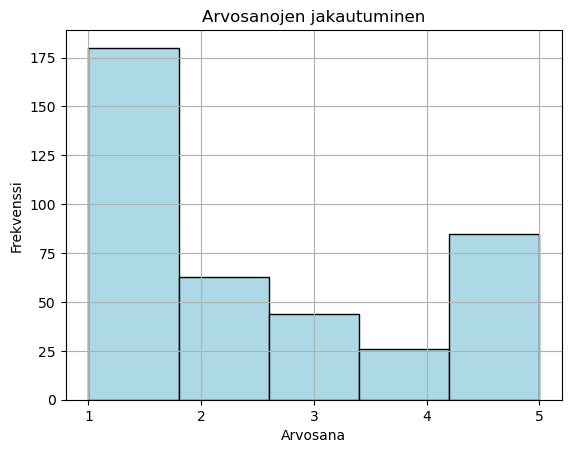

In [14]:
#Tutkitaan vielä kokonaiskuva arvosanojen jakaumasta ilman luokittelua sentimentteihin
df_final['rating'].hist(bins=5, edgecolor='black',  color='lightblue')
plt.title('Arvosanojen jakautuminen')
plt.xlabel('Arvosana')
plt.ylabel('Frekvenssi')
plt.xticks(range(1, 6))  # Asetetaan x-akseli arvosanoille 1-5
plt.show()

Lasketaan eri sävyjen esiintymiset ja visualisoidaan sentimentit. 

sentiment_class
Positive    153
Neutral     128
Negative    117
Name: count, dtype: int64


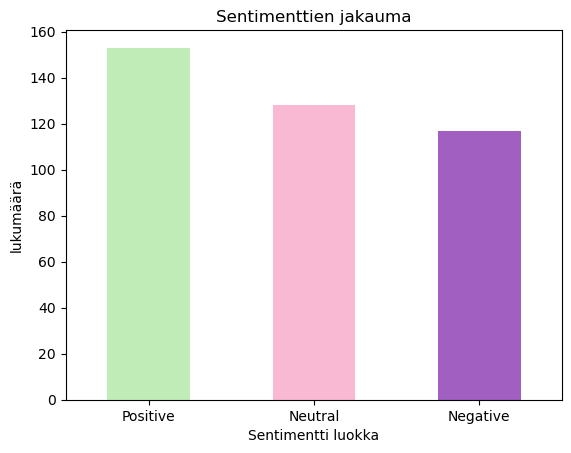

In [15]:
sentiment_counts = df_final['sentiment_class'].value_counts()
print(sentiment_counts)

# Piirretään pylväskaavio sentimenttiluokkien esiintymisistä
sentiment_counts.plot(kind='bar', color=['#C0ECB8', '#F9B9D2', '#A05FC1'])
plt.title('Sentimenttien jakauma')
plt.xlabel('Sentimentti luokka')
plt.ylabel('lukumäärä')
plt.xticks(rotation=0)
plt.show()


Selvitetään negatiivisten palautteiden yhteyttä tähtiarvosteluun.

In [16]:
negative_reviews = df_final[df_final['sentiment_class'] == 'Negative']
print(negative_reviews['rating'].describe())

count    117.000000
mean       1.478632
std        0.886666
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: rating, dtype: float64


In [17]:
# Lasketaan arvostelujen määrä jokaisesta arvosanasta
rating_counts = df_final['rating'].value_counts()

# Lasketaan yhden tähden arvostelujen määrä
one_star_count = rating_counts.get(1, 0)
print(f"Yhden tähden arvostelujen määrä: {one_star_count}")

Yhden tähden arvostelujen määrä: 180


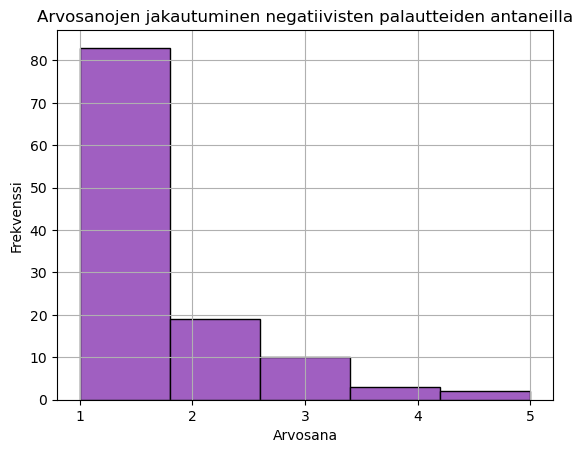

In [18]:
# Piirretään histogrammi rating-jakaumasta negatiivissävytteisissä palautteissa
negative_reviews['rating'].hist(bins=5, edgecolor='black',  color='#A05FC1')
plt.title('Arvosanojen jakautuminen negatiivisten palautteiden antaneilla')
plt.xlabel('Arvosana')
plt.ylabel('Frekvenssi')
plt.xticks(range(1, 6))
plt.show()

In [19]:
# Lasketaan muuttujien välinen korrelaatio
correlation = negative_reviews[['rating', 'sentiment']].corr()
print("Korrelaatio arvion ja sentimentin välillä:\n", correlation)


Korrelaatio arvion ja sentimentin välillä:
              rating  sentiment
rating     1.000000   0.011667
sentiment  0.011667   1.000000


Korrelaatioarvo sentimentin ja arvion välillä osoittaa, että on olemassa lievä positiivinen yhteys näiden kahden muuttujan välillä negatiivisten palautteiden kontekstissa.

<h3 style="color: #5B786D;"> Analysoidaan negatiivisten arvioiden sisältöä </h3>

In [20]:
# Tutkitaan tarkemmin negatiivisia palautteita ja niiden sisältöjä

# Tulosta ensimmäiset muutama rivi tarkastelua varten
print(negative_reviews['review_description'].head(30))


5     loved this app until the latest update the sle...
10    not a fan of the update difficult to read on p...
14    new sleep layout is the absolute worst its so ...
20    ditto to previous onestar reviewers saying how...
24    i hate the new update so annoying and now hard...
30    seemed worthless without premium so i signed u...
36    before the sleep tracking ui redesign i would ...
37     changes keep making the experience and app worse
40    graph redesign is terrible especially the slee...
43    the marchapril 2024 app redesign is absolutely...
44    quit fixing things that arent broken the app u...
45    horrible loosing way sleep after the change br...
46    the new redesign is terrible there is less inf...
47    the user interface has been going downhill for...
50    im not very happy with the redesign of the sle...
51    very unhappy with the change of the sleep form...
54                               versa 4 unable to sync
57    terrible with the new design comes problem

Lasketaan vielä erikseen sanoja, jotka liittyvät negatiivisiin palautteisiin. Lisätään stopwordseihin app ja fitbit, koska ne voivat esiintyä useissa palautteissa.

In [21]:
import nltk
from nltk.corpus import stopwords
from collections import Counter

nltk.download('stopwords')

# Haetaan NLTK:n valmiit englannin stop-sanat ja lisätään niihin fitbit ja app
custom_stopwords = set(stopwords.words('english')) | {'fitbit'} | {'app'}

# Suodatetaan negatiiviset palautteet
negative_reviews = df_final[df_final['sentiment_class'] == 'Negative']

# Yhdistetään kaikki arvostelut yhdeksi suureksi tekstiksi
all_text = ' '.join(negative_reviews['review_description'].values)

# Muunnetaan teksti sanoiksi ja poistetaan stop-words
words = all_text.split()
filtered_words = [word for word in words if word not in custom_stopwords]

# Lasketaan yleisimmät sanat ja näytetään 10 yleisintä
word_counts = Counter(filtered_words)
most_common_words = word_counts.most_common(10)
print("Yleisimmät negatiivisissa palautteissa esiintyvät sanat:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")


Yleisimmät negatiivisissa palautteissa esiintyvät sanat:
sleep: 107
update: 68
new: 51
read: 36
back: 28
terrible: 24
change: 22
please: 21
see: 19
horrible: 18


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\riina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Huomataan, että sanat 'sleep', 'update' ja 'new' esiintyvät useimmin negatiivisissa palautteissa. Tutkitaan tarkemmin vielä mihin nämä liittyvät.

In [22]:
# Etsitään negatiiviset arvostelut, jotka sisältävät sanan 'sleep', 'update' ja 'new'
keywords = ['sleep', 'update', 'new']
pattern = '|'.join(keywords)

# Käytetään str.contains regex=true sallimaan useampien termien etsintä
keyword_mentions = negative_reviews[negative_reviews['review_description'].str.contains(pattern, case=False, na=False)]

# Tulostetaan ensimmäiset 10 riviä jokaisesta kategoriasta
for keyword in keywords:
    filtered_reviews = keyword_mentions[keyword_mentions['review_description'].str.contains(keyword, case=False, na=False)]
    print(f"Arvostelut, jotka sisältävät sanan '{keyword}':")
    print(filtered_reviews['review_description'].head(10), '\n\n')


Arvostelut, jotka sisältävät sanan 'sleep':
5     loved this app until the latest update the sle...
14    new sleep layout is the absolute worst its so ...
20    ditto to previous onestar reviewers saying how...
36    before the sleep tracking ui redesign i would ...
40    graph redesign is terrible especially the slee...
43    the marchapril 2024 app redesign is absolutely...
44    quit fixing things that arent broken the app u...
45    horrible loosing way sleep after the change br...
47    the user interface has been going downhill for...
50    im not very happy with the redesign of the sle...
Name: review_description, dtype: object 


Arvostelut, jotka sisältävät sanan 'update':
5     loved this app until the latest update the sle...
10    not a fan of the update difficult to read on p...
14    new sleep layout is the absolute worst its so ...
20    ditto to previous onestar reviewers saying how...
24    i hate the new update so annoying and now hard...
44    quit fixing things tha

Lyhyen tutkailun jälkeen sleep-sana liittyy unentarkkailuominaisuuden ongelmiin, ja update uusiin päivityksiin.

<h3 style="color: #5B786D;"> Tutkitaan vielä, liittyvätkö molemmat sanat samoihin arvosteluihin.</h3>

In [23]:
def check_words_in_sentences(review):
    sentences = review.split('.')
    for sentence in sentences:
        if 'sleep' in sentence.lower() and 'update' in sentence.lower():
            return True
    return False

# Käytetään funktiota jokaiseen arvostelu-sarakkeeseen
negative_reviews.loc[:, 'sleep_and_update'] = negative_reviews['review_description'].apply(check_words_in_sentences)

# Lasketaan 'sleep' ja 'update' sanojen esiintyminen samoissa lauseissa
count_sleep_update = negative_reviews['sleep_and_update'].sum()
print(f"Lauseita, joissa sekä 'sleep' että 'update': {count_sleep_update}")

# Tulostetaan esimerkkejä lauseista
example_sentences = negative_reviews[negative_reviews['sleep_and_update'] == True]['review_description']
for example in example_sentences.head():
    print(example)
    print("\n---\n")


Lauseita, joissa sekä 'sleep' että 'update': 47
loved this app until the latest update the sleep section is absolutely terrible now its extremely difficult to explore your sleep metrics from the night before you no longer can click on awake or rem or light or deep and see your time spent in each also you no longer can do a day by day scroll of your sleep scores a terrible change

---

new sleep layout is the absolute worst its so hard to read any of my data now update 42334 it is now also not tracking my workouts accurately i just did a 20 minute intensive workout and i checked a couple times through the workout and was in vigorous stage but it only gave me 6 minutes of azms for it even though i should have had closer to 20 to 30 minutes ridiculous whats the point of having a fitbit if it cant even track my workouts and the sleep chart is unreadable

---

ditto to previous onestar reviewers saying how horrible the latest update is sleep tracking shows no data eliminating one of the mai

C:\Users\riina\AppData\Local\Temp\ipykernel_5420\1094337673.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews.loc[:, 'sleep_and_update'] = negative_reviews['review_description'].apply(check_words_in_sentences)


Vaikuttaa siltä, että uusi päivitys on aiheuttanut ongelmia unenseurantaominaisuuteen ja aiheuttaa käyttäjissä tyytymättömyyttä.

<h3 style="color: #5B786D;"> Tutkitaan vielä, mitkä asiat ovat mahdollisesti aiheuttaneet arvosanan 1 </h3>

In [24]:
# Suodatetaan negatiiviset arvostelut, joissa arvosana on 1
one_star_negative_reviews = df_final[(df_final['sentiment_class'] == 'Negative') & (df_final['rating'] == 1)]

# Määritellään funktio, joka tarkistaa, esiintyvätkö sekä 'update' että 'sleep' arvostelutekstissä
def contains_keywords(text):
    return 'update' in text.lower() and 'sleep' in text.lower()

# Kerätään arvostelut, jotka sisältävät molemmat avainsanat
relevant_reviews = one_star_negative_reviews[one_star_negative_reviews['review_description'].apply(contains_keywords)]

# Tulostetaan ensimmäiset rivit
print("Löytyneitä arvosteluja, joissa on sana 'update' ja 'sleep'\n:", len(relevant_reviews))
print(relevant_reviews[['review_description', 'rating']])


Löytyneitä arvosteluja, joissa on sana 'update' ja 'sleep'
: 36
                                    review_description  rating
5    loved this app until the latest update the sle...       1
14   new sleep layout is the absolute worst its so ...       1
20   ditto to previous onestar reviewers saying how...       1
47   the user interface has been going downhill for...       1
72   the latest update has destroyed this app for m...       1
74   the mew sleep feature is absolutely horrible t...       1
85   please go back to the old sleep graphics the u...       1
93   ever since the new update the sleep graph is a...       1
98   hate the new updated sleep graph absolutely no...       1
117  terrible update since fitbit was bought by goo...       1
121  newest update has changed the graphics viewing...       1
122  updated 42024 developers have ruined the sleep...       1
138  can you please put the sleep section back to t...       1
140  updated april 2024 the latest update is even w...

<h3 style="color: #5B786D;"> Tarkastellaan, onko kellonajalla yhteyttä huonoille arvosanoille </h3>

C:\Users\riina\AppData\Local\Temp\ipykernel_5420\337473759.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_rating_reviews.loc[:,'hour_of_day'] = low_rating_reviews['review_date'].dt.hour


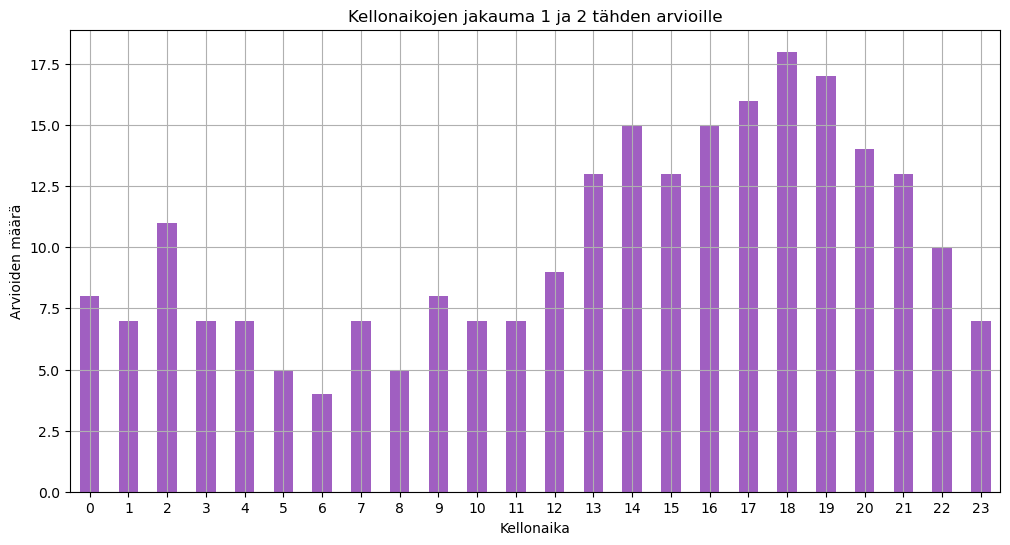

In [25]:
# Varmistetaan aluksi, että 'review_date' on datetime-muodossa
df_final['review_date'] = pd.to_datetime(df_final['review_date'])

# Suodatetaan arvostelut 1 ja 2 tähden arviot
low_rating_reviews = df_final[df_final['rating'].isin([1, 2])]

# Johdetaan kellonaika
low_rating_reviews.loc[:,'hour_of_day'] = low_rating_reviews['review_date'].dt.hour

# Tarkastellaan mihin kellonaikoihin arvostelut on annettu
hourly_distribution = low_rating_reviews['hour_of_day'].value_counts().sort_index()

# Piirretään kuvaaja
plt.figure(figsize=(12, 6))
hourly_distribution.plot(kind='bar', color='#A05FC1')
plt.title('Kellonaikojen jakauma 1 ja 2 tähden arvioille')
plt.xlabel('Kellonaika')
plt.ylabel('Arvioiden määrä')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


Kellonaikaa ei voida pitää selittävänä tekijänä välttämättä. Toisaalta, koska suurin osa heikoista arvioista on iltapäivällä ja illalla, voisi toki päätellä, että työpäivän jälkeen väsyneenä on helpompi antaa huono arvio. Lasketaan kuitenkin vielä korrelaatio.

In [26]:
# korrelaatio 'rating' ja 'hour_of_day'
correlation = low_rating_reviews[['rating', 'hour_of_day']].corr()
print("Korrelaatio matalan arvion ja kellonajan välillä:\n", correlation)


Korrelaatio matalan arvion ja kellonajan välillä:
               rating  hour_of_day
rating       1.00000     -0.04862
hour_of_day -0.04862      1.00000


Lukema on hyvin matala, eli ei ole suoraa merkittävää yhteyttä näiden muuttujien välillä.

<h3 style="color: #5B786D;"> Tutkitaan positiiviset sanat arviosanoilla 4 ja 5 </h3>

In [27]:

# Suodatetaan positiiviset arvostelut, jotka ovat saaneet arvosanan 5 tai 4
high_rating_reviews = df_final[(df_final['rating'] == 5) | (df_final['rating'] == 4)]

# Yhdistetään kaikki arvostelut yhdeksi suureksi tekstiksi
all_text = ' '.join(high_rating_reviews['review_description'].values)

# Muunnetaan teksti sanoiksi ja poistetaan stop-words
words = all_text.split()
filtered_words = [word for word in words if word not in custom_stopwords]

# Lasketaan yleisimmät sanat ja näytetään 10 yleisintä
word_counts = Counter(filtered_words)
most_common_words = word_counts.most_common(10)
print("Yleisimmät sanat arvosanojen 5 ja 4 arvosteluissa:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

Yleisimmät sanat arvosanojen 5 ja 4 arvosteluissa:
love: 25
sleep: 24
track: 22
good: 21
steps: 17
great: 15
used: 11
helps: 11
much: 11
data: 11


Yllättävää, että 'sleep' esiintyy myös positiivisissa arvioissa.

<h3 style="color: #5B786D;"> Tutkitaan kokonaiskuvaa arvostelujen ja sentimenttiluokkien välillä </h3>

In [28]:
# Luo ristiintaulukointi sentimenttiluokan ja arvion välillä
sentiment_rating_ct = pd.crosstab(df_final['sentiment_class'], df_final['rating'])

# Tulosta ristiintaulukointi tarkastelua varten
print(sentiment_rating_ct)


rating            1   2   3   4   5
sentiment_class                    
Negative         83  19  10   3   2
Neutral          66  24  17   3  18
Positive         31  20  17  20  65


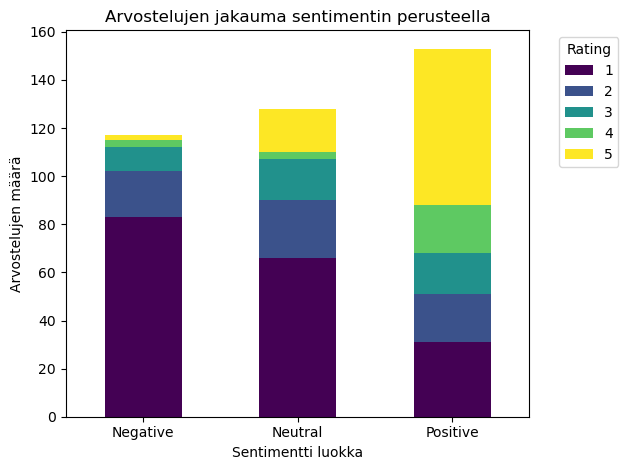

In [29]:
# Visualisoidaan ristiintaulukointi
sentiment_rating_ct.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Arvostelujen jakauma sentimentin perusteella')
plt.xlabel('Sentimentti luokka')
plt.ylabel('Arvostelujen määrä')
plt.xticks(rotation=0)
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Kehittäjän vastauksia negatiivisiin arvosteluihin: 16 kpl
Negatiivisia arvosteluja yhteensä: 117 kpl


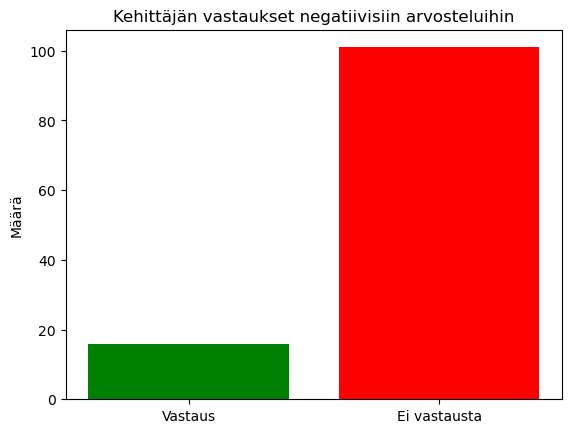

In [30]:
# Suodatetaan negatiiviset arvostelut, jotka sisältävät kehittäjän vastauksen
actual_responses = negative_reviews[negative_reviews['developer_response'] != 'No Response']

# Lasketaan, kuinka monessa negatiivisessa arvostelussa on oikea kehittäjän vastaus
actual_response_count = len(actual_responses)
print(f"Kehittäjän vastauksia negatiivisiin arvosteluihin: {actual_response_count} kpl")
print(f"Negatiivisia arvosteluja yhteensä: {len(negative_reviews)} kpl")

labels = ['Vastaus', 'Ei vastausta']
values = [actual_response_count, len(negative_reviews) - actual_response_count]

# Tehdään pylväskaavio
plt.bar(labels, values, color=['green', 'red'])
plt.title('Kehittäjän vastaukset negatiivisiin arvosteluihin')
plt.ylabel('Määrä')
plt.show()


Oleellista voisi olla tietää myös, kuinka nopeasti arvosteluihin/kysymyksiin vastataan kehittäjien toimesta. Määritellään vastausnopeus.

In [31]:
df_final['response_time'] = df_final['developer_response_date'] - df_final['review_date']
df_final['response_time'] = df_final['response_time'].apply(lambda x: x.total_seconds() / 3600.0)  # Muunnetaan tunneiksi

# Tutkitaan saatuja arvoja
df_final['response_time'].describe()

count       69.000000
mean     -1462.001522
std       6726.238188
min     -40186.133333
25%         -0.183889
50%          0.180833
75%          0.248056
max          1.088889
Name: response_time, dtype: float64

Arvoissa ei saisi olla negatiivisia lukuja, korjataan vielä niin, että aika lasketaan oikein.

In [32]:
# Suodata pois negatiiviset response_time arvot
df_final_filtered = df_final[df_final['response_time'] >= 0]

# Laske tilastolliset tiedot uudelleen puhdistetulle datalle
print(df_final_filtered['response_time'].describe())


count    47.000000
mean      0.272252
std       0.202478
min       0.035278
25%       0.179861
50%       0.221111
75%       0.274444
max       1.088889
Name: response_time, dtype: float64


Laskelmien perusteella kehittäjät ovat vastanneet melko nopeasti palautteisiin. Tämä ei kuitenkaan kerro siitä, ovatko käyttäjät tyytyväisiä vastauksen saatuaan.

In [33]:
# Määritellään uusia ominaisuuksia ja tehdään lisää ominaisuuksien laskentaa koneoppimismallia varten
# Globaalisti määritellyt negaatiot ja erikoissanat
negations = {'not', 'no', 'never', 'none', 'nothing', 'neither', 'nor', 'nowhere'}
special_words = {'excellent', 'poor', 'failure'}

def extract_features(df):
    # Sanojen määrä
    df['word_count'] = df['review_description'].apply(lambda x: len(x.split()))

    # Merkkien määrä
    df['char_count'] = df['review_description'].apply(lambda x: len(x))

    # Negaatioita sisältävien lauseiden määrä
    df['negation_count'] = df['review_description'].apply(lambda x: sum(x.count(neg) for neg in negations))

    # Erityisten sanojen esiintymiskerrat
    df['special_word_count'] = df['review_description'].apply(lambda x: sum(x.count(word) for word in special_words))

    return df

df_final = extract_features(df_final)


<h3 style="color: #5B786D;"> Teksti numeeriseen muotoon </h3>
Teksti tulee muuttaa vielä numeeriseen muotoon, jotta sitä voidaan käyttää koneoppimismalleissa paremmin. Muunnetaan data vektorimuotoon.

<p style="color: #5B786D;">TF-IDF (Term Frequency-Inverse Document Frequency) </p>mittaa eri sanojen tärkeyttä kontekstissa ja auttaa tunnistamaan merkityksellisimmät sanat datasta

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Tekstin TF-IDF vektorisointi
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df_final['review_description'])

df_final['word_length'] = df_final['review_description'].apply(lambda x: len(x.split()))
df_final['negation_count'] = df_final['review_description'].apply(lambda x: sum(1 for word in x.split() if word in negations))
df_final['special_word_count'] = df_final['review_description'].apply(lambda x: sum(x.count(word) for word in special_words))

# Muunnetaan lisäominaisuudet numpy-taulukoksi
additional_features = df_final[['word_length', 'negation_count', 'special_word_count']].values

y = df_final['rating']
# Yhdistetään TF-IDF matriisi ja lisäominaisuudet yhdeksi feature-matriisiksi
X_features = np.hstack((X_tfidf.toarray(), additional_features))
# Lisätään muita ominaisuuksia
additional_features = df_final[['word_length', 'negation_count', 'special_word_count']].to_numpy()

# Yhdistetään TF-IDF -vektorit muihin ominaisuuksiin
X_combined = np.hstack((X_tfidf.toarray(), additional_features))

## Ohjattu koneoppiminen

Ohjattu koneoppiminen on yleisin koneoppimisen muoto. Ohjatussa koneoppimisessa mallille annetaan opetusdataa, jossa on halutunlaiset tulokset tai vastaukset. Tämän annetun mallin avulla malli oppii ennustamaan ja luokittelemaan uusia tietoja.

- Malli: matemaattinen tai tilastollinen rakenne, joka oppii esitetettyjen syötteiden ja niitä vastaavien tulosten väliset yhteydet
- Opetusdata: yleensä suuri määrä dataa, kuten esimerkkejä tai havaintoja, joilla on tietyt tavoitetulokset. Esimerkiksi kuvantunnistustehtävässä kuvat voivat olla merkittyjä niissä esiintyvien objektien mukaan.
- Opetusalgoritmi: Menetelmä, jolla malli sopeutetaan tai "opetetaan" käyttämällä opetusdataa. Tämä vaihe sisältää mallin virheen minimoimisen, eli sen kuinka hyvin mallin ennusteet vastaavat todellisia tuloksia.
- Ennusteet: Mallin antamat tulokset, kun sille syötetään uusia tietoja, joita se ei ole aiemmin nähnyt.

### Sovelluskohteita

- Hintaennusteiden tekeminen: Esimerkiksi asuntojen hintahistorian,sijainnin ja koon perusteella, voidaan tehdä ennusteita.
- Kuvantunnistus: Syötetään mallille kuvia jostakin ilmiöstä tai asiasta opettamaan mallia tunnistamaan kuvista tiettyjä asioita
- Roskapostin-tunnistus: sähköpostiohjelmissa voi merkitä sähköposteja roskapostiksi, ja malli oppii ennustamaan ja luokittelemaan posteja

### Ohjatun oppimisen tyypit

- Luokittelu: mallin tavoitteena on ennustaa rajoitettua joukkoa arvoja edustavia tuloksia. Esimerkiksi sähköpostin luokittelu roskapostiksi tai ei-roskapostiksi.
- Regressio: malli pyrkii ennustamaan jatkuvia arvoja, kuten asunnon hintoja, perustuen asuntojen ominaisuuksiin..

Tässä työkirjassa yritetään löytää sopiva koneoppimismalli ennustamaan sovelluksen arvioita. Kokeillaan esimerkiksi logistista regressiota ja päätöspuuta.

<h2 style="color: #5B786D;">Datatiedeprojekti vaihe 4. Datan jakaminen koulutus- ja testidataan</h2>

Data jaetaan koulutus- ja testijoukkoihin train_test_split-funktiolla, jossa 20% datasta on varattu testausta varten. Jakamalla data koulutus- ja testijoukkoihin ennen mallin kehittämistä, varmistetaan, että malli ei ole ylisovitettu ja että se suoriutuu hyvin uusilla, ennen näkemättömillä tiedoilla. Tämä vaihe auttaa kehittämään luotettavampia ja tehokkaampia koneoppimismalleja.

In [35]:
from sklearn.model_selection import train_test_split

# X-features on edellisessä vaiheessa saatu matriisi, y on rating-sarake

X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)


In [36]:
from sklearn.preprocessing import StandardScaler

# Standardisoi ominaisuudet
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


<h2 style="color: #5B786D;">Datatiedeprojekti vaihe 5. Mallin kehittäminen, arviointi ja käyttöönotto</h2>

Etsitään sopiva koneoppimismalli ennustamaan sovelluksen saamia arvioita. Vaihe sisältää iteraatioita.

Kokeillaan ensiksi logistista regressiota.

>Logistinen regressio on yleisesti käytetty tilastollinen malli, jota käytetään usein binääristen luokitteluongelmien ratkaisemiseen koneoppimisessa ja tilastotieteessä. Logistinen regressio ennustaa tapahtuman todennäköisyyden, joka voi saada vain kaksi arvoa (esimerkiksi Kyllä/Ei, Onnistui/Epäonnistui, Sairas/Terve).

Kun malli on koulutettu, sitä testataan käyttämällä testidataa. Tässä vaiheessa arvioidaan mallin suorituskykyä käyttämällä suorituskykymittareita, kuten tarkkuutta, palautusta, F1-pisteytystä jne. Jos malli suoriutuu hyvin testauksessa ja täyttää projektin vaatimukset, se voidaan ottaa käyttöön reaalimaailman dataan.


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

<h3 style="color: #5B786D;"> Ensimmäisen mallin testaus </h3>

In [38]:
# Luodaan logistinen regressiomalli
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Kouluta malli käyttäen koulutusdataa
logreg.fit(X_train_scaled, y_train)

# Ennustetaan testidatan arvot
y_pred = logreg.predict(X_test_scaled)

# Arvioi mallin suorituskyky, käytetään zero_division funktiota, jolloin määrittelemätön tarkkuus asetetaan tähän arvoon sen sijaan, että se johtaisi virheeseen
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           1       0.62      0.83      0.71        35
           2       0.33      0.17      0.22        12
           3       0.25      0.17      0.20         6
           4       0.33      0.20      0.25         5
           5       0.85      0.77      0.81        22

    accuracy                           0.62        80
   macro avg       0.48      0.43      0.44        80
weighted avg       0.59      0.62      0.60        80



Tarkastellan  scoreja:
- Precision: kuvaa mallin tarkkuutta
- Recall: kuvaa herkkyyttä, eli kuinka monta todellista positiivista tapausta malli ennusti oikein.
- F1-score: tilastollinen mittari erityisesti binääristen luokitteluongelmien yhteydessä arvioimaan koneoppimismallin suorituskykyä. Arvo on Recall ja Precision scoresta johdettu keskiarvo. Tässä mallissa arvosanojen 1 ja 5 ennustaminen sujuu kohtuullisen hyvin, muut huonosti tai malli ei kykene ennustamaan lainkaan. Kokeilin malliin eri parametreja, mutta tulokset eivät parantuneet.

- Accuracy: mallin tarkkuus, osoittaa kuinka suuri osa kaikista ennusteista on oikein.

Kokeillaan seuraavaksi vielä eri testijoukolla logistista regressiota.

<h3 style="color: #5B786D;"> Toisen mallin testaus </h3>

In [39]:
# Koulutetaan uusi logistinen regressiomalli
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Ennustetaan testijoukolla
y_pred = logreg.predict(X_test)

# Tulostetaan suorituskykyraportti
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           1       0.57      1.00      0.73        35
           2       1.00      0.00      0.00        12
           3       1.00      0.00      0.00         6
           4       1.00      0.00      0.00         5
           5       0.89      0.77      0.83        22

    accuracy                           0.65        80
   macro avg       0.89      0.35      0.31        80
weighted avg       0.78      0.65      0.55        80



Nyt tapahtuu pientä muutosta, mutta muita ei välttämättä parempaan suuntaan.

Otetaan seuraavaksi käyttöön päätöspuuluokittelu.

<h3 style="color: #5B786D;"> Kolmannen mallin testaus </h3>

Kokeillaan päätöspuuluokittelua, joka on ohjatun koneoppimisen malli, jota voidaan hyödyntää luokittelu - ja regressio-ongelmissa, rmmidys,ssm tietyn luokan todennäköisyyttä. Ennustaminen perustuu syötteenä annettujen ominaisuuksien arvoihin.

In [40]:
from sklearn.tree import DecisionTreeClassifier

# luodaan päätöspuu
tree_model = DecisionTreeClassifier()

# Koulutetaan malli
tree_model.fit(X_train, y_train)

# Ennusteet
y_pred_tree = tree_model.predict(X_test)

# Arvioidaan mallin suorituskyky
print(classification_report(y_test, y_pred_tree))


              precision    recall  f1-score   support

           1       0.62      0.69      0.65        35
           2       0.33      0.25      0.29        12
           3       0.20      0.17      0.18         6
           4       0.00      0.00      0.00         5
           5       0.80      0.91      0.85        22

    accuracy                           0.60        80
   macro avg       0.39      0.40      0.39        80
weighted avg       0.55      0.60      0.57        80



Nyt ainoastaan enää 3-arvosanaa ei pystytä ennustamaan.

Otetaan vielä SVM-malli käyttöön.

> Support Vector Machine (SVM)on yksi tehokkaimmista ja monipuolisimmista koneoppimisen malleista erityisesti luokitteluongelmiin. SVM toimii luomalla optimaalisen erottavan hyperpinnan, jota kutsutaan päätösraja- tai marginaalirajaksi, joka pyrkii maksimoimaan etäisyyden lähimpien koulutuspisteiden (tukivektorit) välillä eri luokista. Siinä käytetään parametreina rbf-kerneliä (auttaa muodostamaan monimutkaisempia päätösrajoja), c-säännöstelyparametria, joka vaikuttaa siihen, miten paljon malli sallii yliluokittelua ja parametria gamma, joka määrittelee yksittäisen koulutuspisteen suuruuden.

In [41]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=10, gamma=0.1, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print(classification_report(y_test, y_pred_svm, zero_division=1))


              precision    recall  f1-score   support

           1       0.57      0.74      0.64        35
           2       0.46      0.50      0.48        12
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         5
           5       0.80      0.55      0.65        22

    accuracy                           0.55        80
   macro avg       0.37      0.36      0.35        80
weighted avg       0.54      0.55      0.53        80



Tulokset eivät vieläkään parane. Tyydytään ensimmäisenä esitetyn mallin tuloksiin. Aineiston ominaisuuksia säätämällä ja lisäämällä voitaisiin saada toimivampia malleja.

<h2 style="color: #5B786D;">Datatiedeprojekti vaihe 6. Mallin käyttöönotto/ testaus toisella datasetillä</h2>

Valitaan edellisen vaiheen ensimmäiseksi käytetty logistisen regression malli. (Aiemmilla iteraatioilla se antoi alkupeärisellä aineistolla parhaat tulokset)
Otetaan käyttöön uusi datasetti reviews.csv (löytyy samasta kansiosta data_science_template/reviews.csv). Datasetti olöytyy myös Kagglesta https://www.kaggle.com/datasets/prakharrathi25/google-play-store-reviews/data .

Sovelletaan työkirjan aiempia vaiheita ja valittua koneoppimismallia uuteen datasettiin.

In [42]:
df_new = pd.read_csv("reviews.csv")

df_new.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14...,I cannot open the app anymore,1,0,5.4.0.6,2020-10-27 21:24:41,NaN,NaN,newest,com.anydo
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,https://play-lh.googleusercontent.com/a-/AOh14...,I have been begging for a refund from this app...,1,0,NaN,2020-10-27 14:03:28,"Please note that from checking our records, yo...",2020-10-27 15:05:52,newest,com.anydo
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,https://play-lh.googleusercontent.com/a-/AOh14...,Very costly for the premium version (approx In...,1,0,NaN,2020-10-27 08:18:40,NaN,NaN,newest,com.anydo
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,https://play-lh.googleusercontent.com/-75aK0WF...,"Used to keep me organized, but all the 2020 UP...",1,0,NaN,2020-10-26 13:28:07,What do you find troublesome about the update?...,2020-10-26 14:58:29,newest,com.anydo
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,https://play-lh.googleusercontent.com/-pBcY_Z-...,Dan Birthday Oct 28,1,0,5.6.0.7,2020-10-26 06:10:50,NaN,NaN,newest,com.anydo




Sarakkeet on nimetty hieman eri tavoin. Jätetään datan puhdistaminen välistä, ja oikaistaan lisäominaisuuksien tekemiseen samalla tavalla kuin aiemman datasetin kanssa. Tarkoituksena vain kokeilla mallin toimivuutta toisella datalla.

In [43]:
new_X_tfidf = tfidf.transform(df_new['content'])

# Lisätään ominaisuuksia
df_new['word_length'] = df_new['content'].apply(lambda x: len(x.split()))
df_new['negation_count'] = df_new['content'].apply(lambda x: sum(1 for word in x.split() if word in negations))
df_new['special_word_count'] = df_new['content'].apply(lambda x: sum(x.count(word) for word in special_words))

# Muutetaan lisäominaisuudet numpy-taulukoksi
new_additional_features = df_new[['word_length', 'negation_count', 'special_word_count']].values

# Yhdistetään TF-IDF matriisi ja lisäominaisuudet yhdeksi feature-matriisiksi
X_features_new = np.hstack((new_X_tfidf.toarray(), new_additional_features))

# Skaalataan
X_scaled_new = scaler.transform(X_features_new)

# Jaetaan testi- ja koulutusdataksi
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_scaled_new, df_new['score'], test_size=0.2, random_state=42)

# Määritellään logistinen regressiomalli
logreg_new = LogisticRegression(max_iter=1500, random_state=42) # max-iter-arvo muutettiin suuremmaksi, sillä tuli varoitus virheen mahdollisuudesta

# Koulutetaan malli koulutusdatalla
logreg_new.fit(X_train_new, y_train_new)

# Ennustetaan testidatan arvot
y_pred_new = logreg_new.predict(X_test_new)

# Arvioidaan mallin suorituskykyä
print(classification_report(y_test_new, y_pred_new))


              precision    recall  f1-score   support

           1       0.49      0.50      0.49       502
           2       0.32      0.31      0.32       456
           3       0.32      0.25      0.28       421
           4       0.39      0.36      0.38       557
           5       0.51      0.64      0.57       563

    accuracy                           0.42      2499
   macro avg       0.41      0.41      0.41      2499
weighted avg       0.41      0.42      0.42      2499



Malli kykenee ennustamaan nyt  kaikkia arvosanoja. Scoret jäävät kuitenkin silti melko matalaksi. Malli toimii, mutta voisi toimia paljon paremmin. Jatkossa voisi tehdä lisää piirteiden jalostusta, tasapainottaa dataa ja säätää parametreja, jotta saatanisiin malli toimimaan paremmin. Paremman koneoppimismallin löytäminen voisi myös parantaa ennusteita.

<h2 style="color: #5B786D;">Datatiedeprojekti vaihe 7. Ohjaamaton oppiminen: Datan klusterointi </h2>

Tehdään vielä harjoitus ohjaamattomasta koneoppimisesta ja tehdään alkuperäiselle aineistolle klusterointi.

Negatiivisten palautteiden klusterointi:


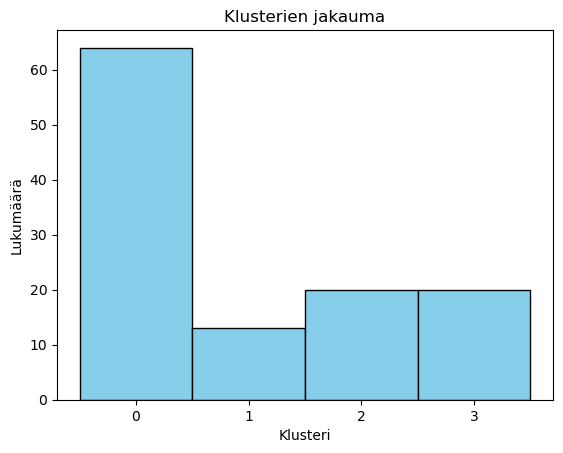

Positiivisten palautteiden klusterointi:


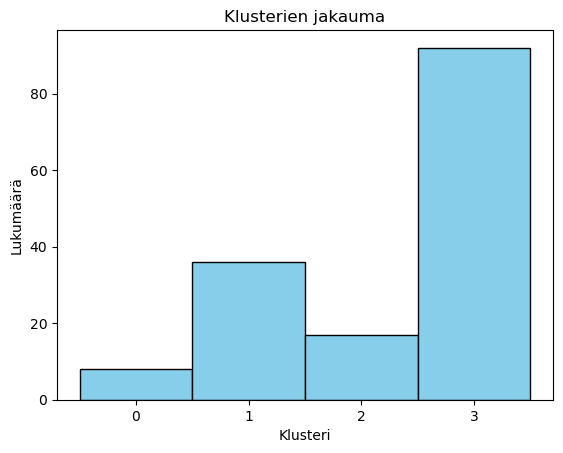

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

stop_words = list(stopwords.words('english')) + ['fitbit', 'app', 'really', 'realized', 'thats', 'song', 'itit', 'soon']

# Eristetään negatiiviset ja positiiviset palautteet
negative_reviews = df_final[df_final['sentiment_class'] == 'Negative']['review_description']
positive_reviews = df_final[df_final['sentiment_class'] == 'Positive']['review_description']


# Vektorisoidaan nyt erikseen positiiviset ja negatiiviset palautteet
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words=stop_words)  
negative_tfidf = tfidf_vectorizer.fit_transform(negative_reviews)
positive_tfidf = tfidf_vectorizer.fit_transform(positive_reviews)

# Määritellään funktio klusteroinnin suorittamiseen ja tulosten visualisointiin
def perform_clustering(data, n_clusters=4):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data)
    labels = kmeans.labels_
    
    # Visualisoidaan klusterit
    plt.hist(labels, bins=range(n_clusters+1), align='left', color='skyblue', edgecolor='black')
    plt.xlabel('Klusteri')
    plt.ylabel('Lukumäärä')
    plt.title('Klusterien jakauma')
    plt.xticks(range(n_clusters))
    plt.show()
    
    return labels

# Klusterointi negatiivisille palautteille
print("Negatiivisten palautteiden klusterointi:")
negative_labels = perform_clustering(negative_tfidf)

# Klusterointi positiivisille palautteille
print("Positiivisten palautteiden klusterointi:")
positive_labels = perform_clustering(positive_tfidf)

In [45]:
def get_top_features_cluster(tfidf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction == label)  # indeksit klusterille
        x_means = np.mean(tfidf_array[id_temp], axis=0)  # keskiarvo klusterin termeille
        sorted_means = np.argsort(x_means)[::-1][:n_feats]  # järjestetään ja valitaan usein esiintyvät termit
        features = tfidf_vectorizer.get_feature_names_out()
        sorted_means = sorted_means[sorted_means < len(features)]
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns=['features', 'score'])
        dfs.append(df)
        
    return dfs


# Klusteroidaan ja visualisoidaan negatiiviset palautteet
kmeans_negative = KMeans(n_clusters=4, random_state=42)
negative_labels = kmeans_negative.fit_predict(negative_tfidf)
negative_cluster_top_words = get_top_features_cluster(negative_tfidf.toarray(), negative_labels, 5)

# Klusteroidaan ja visualisoidaan positiiviset palautteet
kmeans_positive = KMeans(n_clusters=4, random_state=42)
positive_labels = kmeans_positive.fit_predict(positive_tfidf)
positive_cluster_top_words = get_top_features_cluster(positive_tfidf.toarray(), positive_labels, 5)

# Tulostetaan klusterien yleisimmät sanat
print("Top sanat negatiivisissa klustereissa:")
for i, df in enumerate(negative_cluster_top_words):
    print(f"Klusteri {i+1}")
    print(df)
    print()

print("Top sanat positiivisissa klustereissa:")
for i, df in enumerate(positive_cluster_top_words):
    print(f"Klusteri {i+1}")
    print(df)
    print()


Top sanat negatiivisissa klustereissa:
Klusteri 1
       features     score
0       require  0.087784
1          mess  0.074988
2          tell  0.072076
3          bell  0.056274
4  notification  0.052322

Klusteri 2
   features     score
0  disaster  0.083139
1      spot  0.063761
2   require  0.059042
3     keeps  0.047631
4      goes  0.046981

Klusteri 3
   features     score
0  personal  0.092606
1   require  0.076605
2     still  0.067688
3    better  0.063690
4   history  0.062353

Klusteri 4
    features     score
0    pattern  0.113963
1      green  0.098554
2  nutrition  0.093617
3       tens  0.077424
4       tell  0.064234

Top sanat positiivisissa klustereissa:
Klusteri 1
    features     score
0  excellent  0.748708
1   tracking  0.117331
2   provides  0.092573
3   software  0.078407
4     device  0.078224

Klusteri 2
  features     score
0    sleep  0.114642
1     dont  0.073390
2     much  0.064156
3      new  0.062321
4     like  0.056250

Klusteri 3
  features     sc

Etsitään teemat jokaisesta klusterista. Käytetään ChatGPT:tä tähän avuksi:

Negatiiviset:
- Klusteri 1: Communication Issues
- Klusteri 2: Negative Reviews and Criticism
- Klusteri 3: Technical and Operational Problems
- Klusteri 4: Disappointment with Features and Functionality

Positiiviset:
- Klusteri 1: Positive Feedback on Usability
- Klusteri 2: Improvement in Sleep and Well-being
- Klusteri 3: Excellent Tracking and Performance
- Klusteri 4: Love and Satisfaction with Features

<h2 style="color: #5B786D;"> Datatiedeprojekti vaihe 8. Visuaalinen analytiikka: Klustereiden visualisointi</h2>

Kokeillaan t-SNE-menetelmää visualisointiin. Vaihetoehtoja on useita. Mutta muut kokeilemani visualisoinnit eivät toimineet mielestäni niin hyvin ainestoni kuvaamiseen.
>t-SNE, lyhenne sanoista t-distributed Stochastic Neighbor Embedding, on tehokas menetelmä moniulotteisten aineistojen visualisointiin vähemmän ulottuvuuksisessa tilassa, yleisimmin kaksi- tai kolmiulotteisessa avaruudessa. Alkuperäiset datapisteiden väliset etäisyydet muutetaan todennäköisyyksiksi, jotka kuvaavat, kuinka todennäköisesti datapisteet ovat naapureita. 

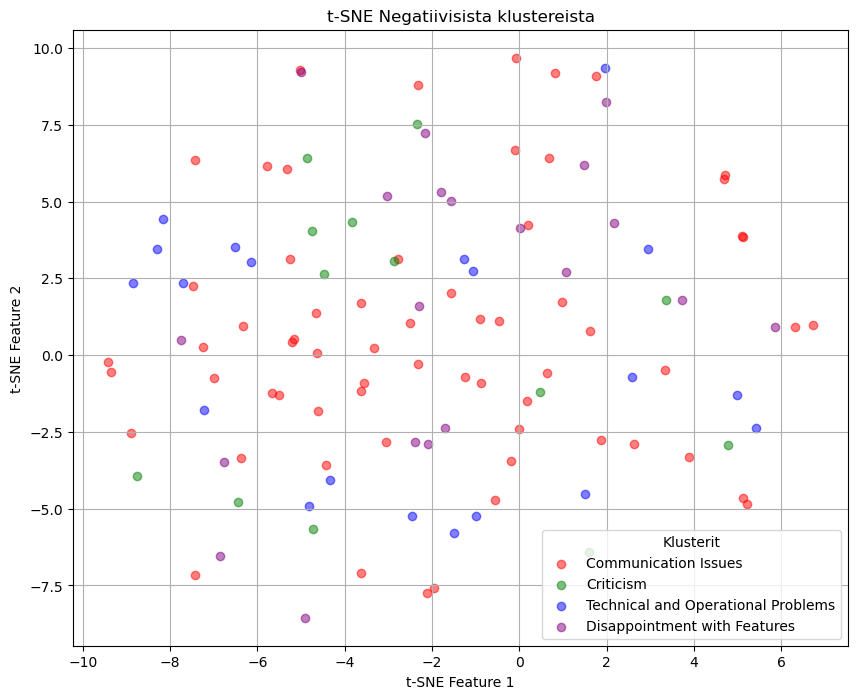

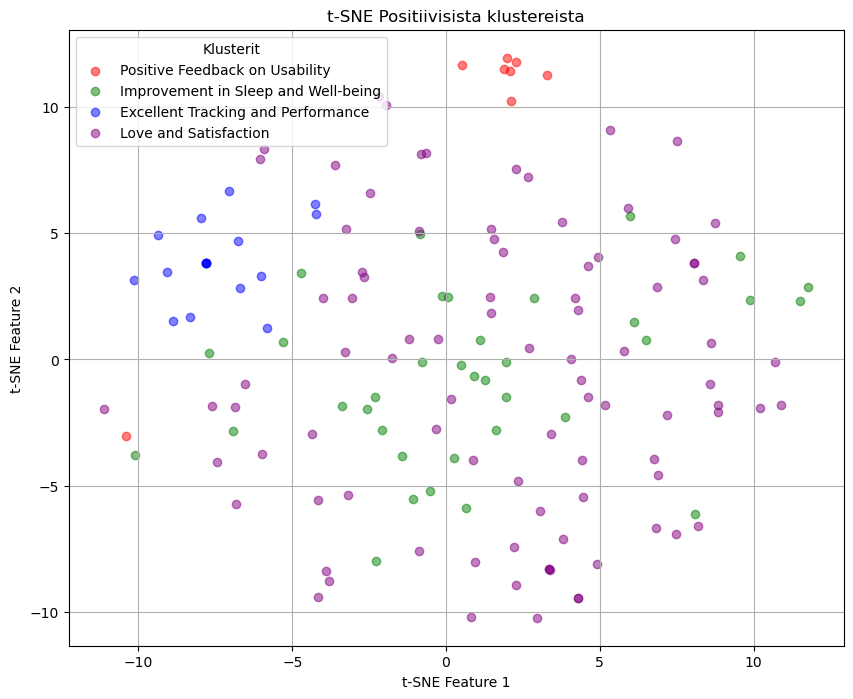

In [46]:
from sklearn.manifold import TSNE

# t-SNE visualisaatio funktio
def tsne_plot(tfidf_data, labels, title, cluster_names):
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(tfidf_data)
    
    plt.figure(figsize=(10, 8))
    color_palette = ['red', 'green', 'blue', 'purple']
    for i, color in enumerate(color_palette):
        plt.scatter(tsne_results[labels == i, 0], tsne_results[labels == i, 1], c=color, label=f'{cluster_names[i]}', alpha=0.5)
    plt.title(title)
    plt.xlabel('t-SNE Feature 1')
    plt.ylabel('t-SNE Feature 2')
    plt.legend(title='Klusterit')
    plt.grid(True)
    plt.show()

# Nimetään kaikki klusterit
negative_cluster_names = ["Communication Issues", "Criticism", "Technical and Operational Problems", "Disappointment with Features"]
positive_cluster_names = ["Positive Feedback on Usability", "Improvement in Sleep and Well-being", "Excellent Tracking and Performance", "Love and Satisfaction"]

# Tehdään t-SNE visualisointi negatiivisille ja positiivisille palautteille
tsne_plot(negative_tfidf.toarray(), negative_labels, 't-SNE Negatiivisista klustereista', negative_cluster_names)
tsne_plot(positive_tfidf.toarray(), positive_labels, 't-SNE Positiivisista klustereista', positive_cluster_names)


Saatuja kuvaajia on hieman vaikea tulkita ainakin maallikon toimesta. Kokeillaan vielä sanapilven tekemistä.

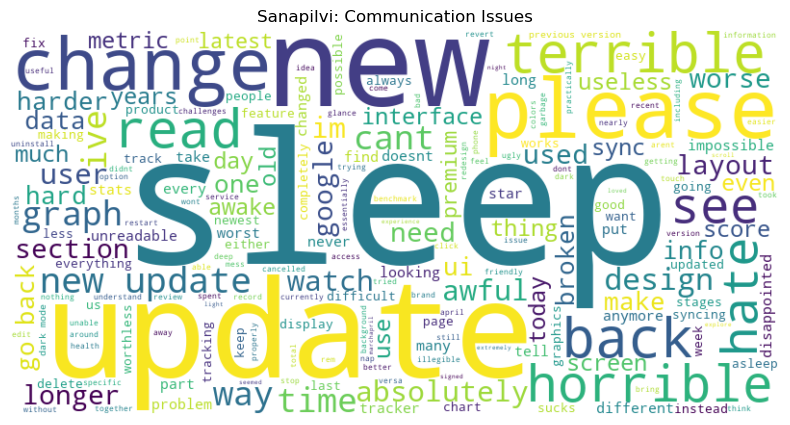

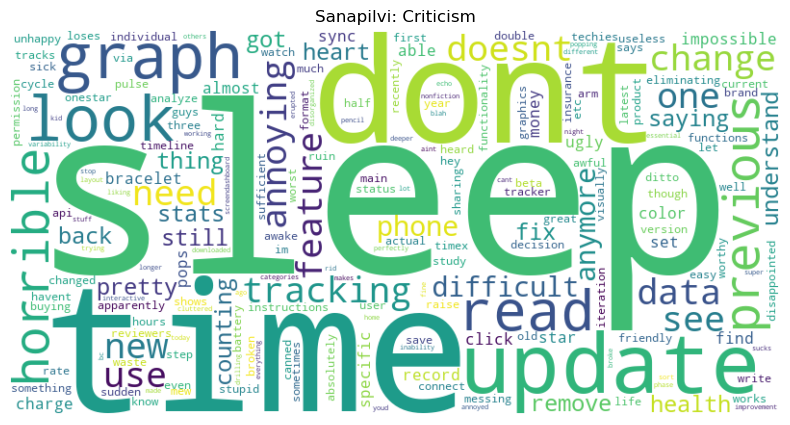

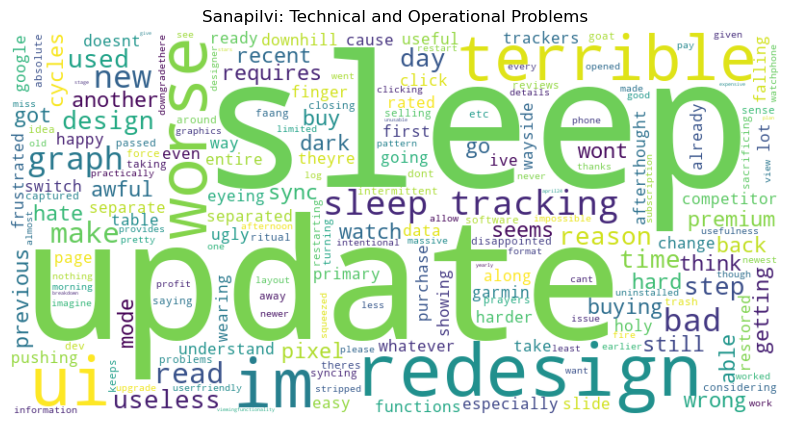

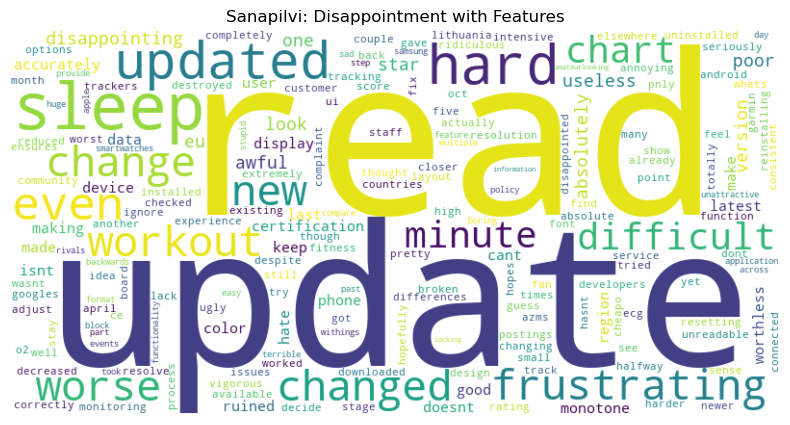

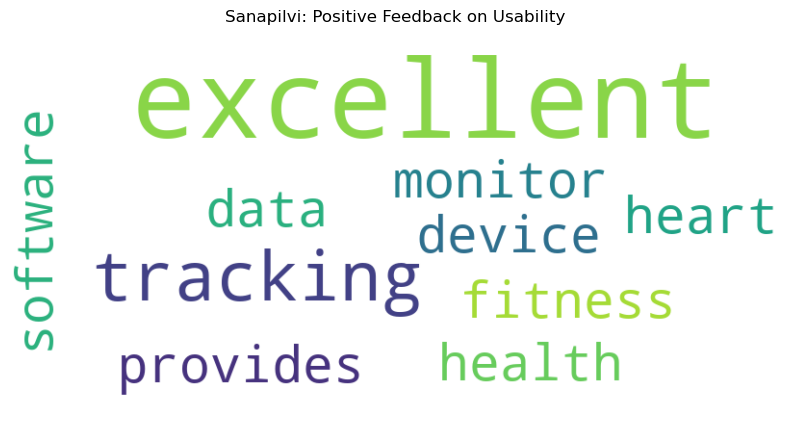

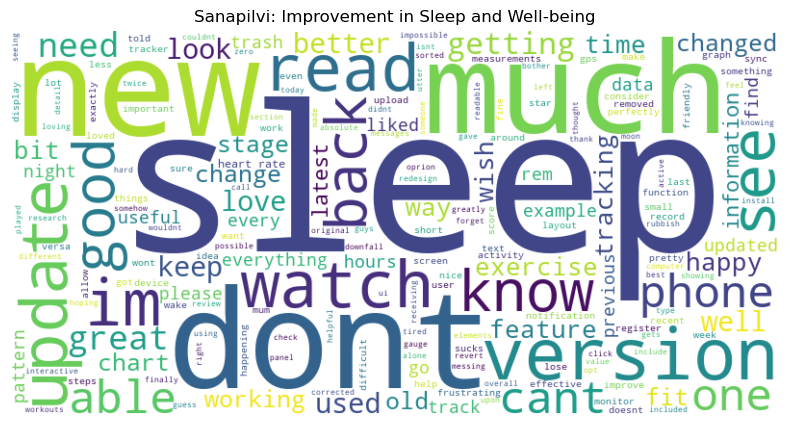

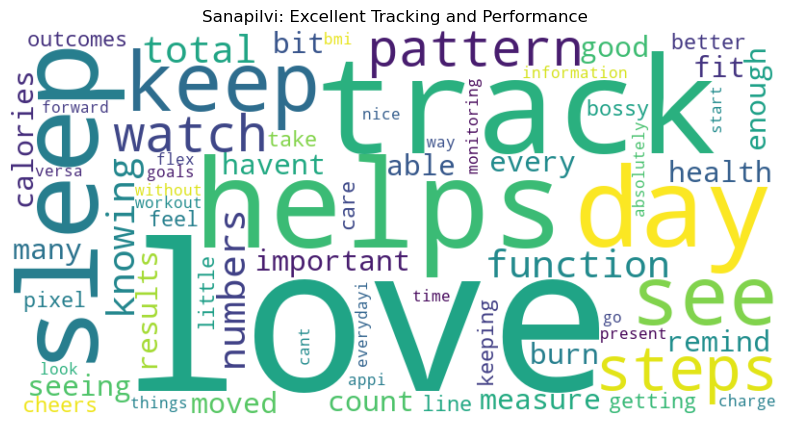

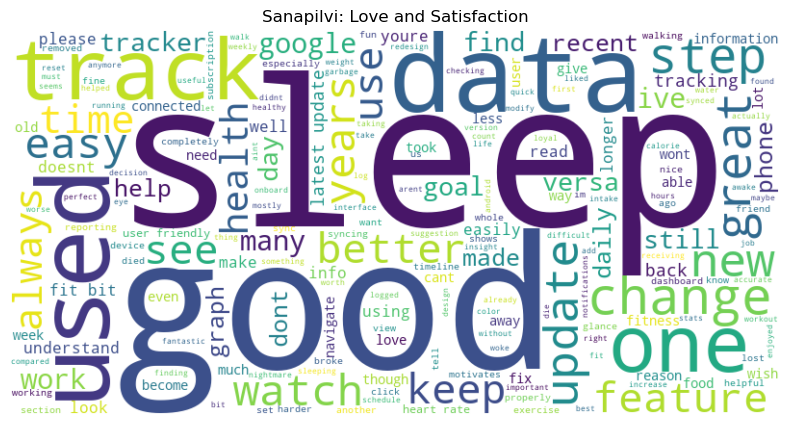

In [47]:
from wordcloud import WordCloud, STOPWORDS

# Luodaan sanapilvet kaikille klustereille
def create_word_cloud(text_data, title, stop_words):
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(' '.join(text_data))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis("off")
    plt.show()

# Kerätään sanat klustereista
def extract_texts_by_cluster(reviews, labels):
    cluster_texts = {i: [] for i in range(max(labels) + 1)}
    for review, label in zip(reviews, labels):
        cluster_texts[label].append(review)
    return cluster_texts

# Kerätäänä sanat klustereittain
negative_texts_by_cluster = extract_texts_by_cluster(negative_reviews.tolist(), negative_labels)
positive_texts_by_cluster = extract_texts_by_cluster(positive_reviews.tolist(), positive_labels)

# Huomioidaan omat stopwordsit
custom_stop_words = set(STOPWORDS).union(set(stop_words))

# Luodaan sanapilvet 

for cluster, texts in negative_texts_by_cluster.items():
    create_word_cloud(texts, f"Sanapilvi: {negative_cluster_names[cluster]}", custom_stop_words)

for cluster, texts in positive_texts_by_cluster.items():
    create_word_cloud(texts, f"Sanapilvi: {positive_cluster_names[cluster]}", custom_stop_words)


Sanapilvet antavat yhdellä silmäyksellä hyvän käsityksen siitä, millaisia sanoja eri tyyppisissä arvosteluissa löytyy. Sanapilvet ovat visuaalisesti informatiivisia ja helppoja ymmärtää.

# Pohdinta ja yhteenveto

Datatiedeprojektin tekeminen oli ennen kaikkea antoisa ja erittäin opettavainen kokemus. Työssä noudatettiin datatiedeprojektin työnkulkua, etsittiin mielenkiintoinen aihe, selvitettiin tapa kerätä dataa, esikäsiteltiin raavittu data, jalostettiin piirteitä, kokeiltiin eri koneoppimismalleja(ohjattuja ja ohjaamattomia), arvioitiin malleja ja visualisoitiin lopulta dataa. 

Eniten aikaa kului ominaisuuksien jalostamiseen ja sopivien, tai tässä tapauksessa kohtuullisten koneoppimismallien löytämiseen. Välillä jouduin palaamaan ominaisuuksien säätämiseen, jotta sain mallit toimimaan edes kohtuullisesti. Pääasia kuitenkin oli käydä koko prosessi läpi vaiheittain ja ymmärtää eri vaiheiden merkitys lopputuleman kannalta. 

Loppua kohden haasteita tuli yllättäen siinä, että tulokset datalla eivät olleet enää niin hyvin toistettavissa. Iteraatioita oli kymmeniä, ja jouduin uudelleen ja uudelleen tekemään muutoksia ja hienosäätöä datan käsittelyyn. Yksi merkittävä syy tähän oli varmasti se, että data kerättiin ns. 'onlinessa', ja aina kun tiedoston ajoi uudelleen, tulokset hieman muuttuivat ja esimerkiksi saatujen arvostelujen määrä vaihteli. Voisi olla järkevää jatkossa tallentaa saatu data aikaisessa työvaiheessa csv:ksi, jotta data pysyisi samana. Toisaalta muuttuva data kuvaa reaalimaailmaa, melkein mikään ei ole pysyvää. Se toi ehdottomasti oman lisämausteensa työhön. Erityisen kiinnostavaa oli tutkia eri muuttujien riippuvuuksia ja tehdä uusia mallinnuksia. Lopputuloksena jäi kuva, että monesti sovelluksen ongelmat liittyivät uusiin päivityksiin. Opin projektista valtavasti asioita ja se sai minut kiinnostumaan datatieteestä entisestään. 



## Lähteet

FeatureHasher and DictVectorizer Comparison. Scikit-learn developers. N.d. https://scikit-learn.org/stable/auto_examples/text/plot_hashing_vs_dict_vectorizer.html#tfidfvectorizeraggle Viitattu 20.4.2024

Geegsforgeeks-websivu. 07.03.2024. What is Web Scraping and How to Use It?  Viitattu 21.4.2024 https://www.geeksforgeeks.org/what-is-web-scraping-and-how-to-use-it/

Heath, A. Medium.  22.03.2023. Web Scraping 101: Tools, Techniques and Best Practices. Viitattu 20.4.2024. https://medium.com/geekculture/web-scraping-101-tools-techniques-and-best-practices-417e377fbeaf

Kundi, G. 2022. How to Scrape Google Play Reviews and do Sentiment Analysis using Python and Transformers. Youtube-video. https://www.youtube.com/watch?v=pPUUxDThnq4 Viitattu 20.4.2024

Decision Trees. rees. Scikit-learn developers. N.d. https://scikit-learn.org/stable/modules/tre 24.4.2024e
IBM-Technology. 27.7.2022. Supervised vs. Unsupervised Learning. Video. https://www.youtube.com/watch?v=W01tIRP_Rqs. Viitattu 10.4.

IBM-Technology. N.d.  What is sentiment analysis? https://www.ibm.com/topics/sentiment-analysis Viitattu 21.4.20242024

Kaggle. Viitattu 14.4.2024. https://www.kaggle.com/

Kinnunen, E. & Hyvärinen, R. Digi- ja väestötietovirasto. 2023. Tekoäly, koneoppiminen ja yleisimmät haasteet. Verkkojulkaisu. https://wiki.dvv.fi/pages/viewpage.action?pageId=230471182 Viitattu 10.4.2024.
.html

Linear Models. Scikit-learn developers. N.d. https://scikit-learn.org/stable/modules/linear_mode Viitattu 24.4.2024l
Neittaanmäki, P & Tuominen, H. 2019. Tekoälyn perusteita ja sovelluksia. Verkkokirja. Jyväskylän yliopisto. https://tim.jyu.fi/view/kurssit/tie/tiep1000/tekoalyn-sovellukset/kirja#DKUvbnUuGytQ Viitattu 10.4.2024
.html

Support Vector Machines. Scikit-learn developers. N.d. https://scikit-learn.org/stable/modules/sv Viitattu 24.4.2024m
t-distributed Stochastic Neighbor Embedding (t-SNE).Scikit-learn developers. N.d. https://scikit-learn.org/stable/modules/manifold.html Viitattu 24.4.2024.
TEPA-termipankki. Web scraping. 2013. Viitattu 21.4.2024. https://termipankki.fi/tepa/fi/haku/web%20scrapingraggle
